# Preprocessing

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
data = pd.read_csv('diabetic_data.csv')

In [178]:
print(data["readmitted"].unique())


['NO' '>30' '<30']


## Handling missing values:

In [179]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

max_glu_serum    96420
A1Cresult        84748
dtype: int64


Since `max_glu_serum` and `A1Cresult` columns have a very high percentage of missing values (about 94.2% and 83.3% missing respectively), We considered dropping them.

Also we dropped  'encounter_id','patient_nbr' since they are unique values.

In [180]:
columns_to_drop = ['max_glu_serum', 'A1Cresult','encounter_id','patient_nbr']
data.drop(columns=columns_to_drop, inplace=True)

## Handling Errors:

In [181]:
unique_counts = {}

for col in data.columns:
    unique_counts[col] = data[col].nunique()

columns_unique = {col: count for col, count in unique_counts.items() if count > 20}

sorted_columns = sorted(columns_unique.items(), key=lambda x: x[1], reverse=True)

for col, count in sorted_columns:
    print(f"Number of unique values in '{col}': {count}")

Number of unique values in 'diag_3': 790
Number of unique values in 'diag_2': 749
Number of unique values in 'diag_1': 717
Number of unique values in 'num_lab_procedures': 118
Number of unique values in 'num_medications': 75
Number of unique values in 'medical_specialty': 73
Number of unique values in 'number_outpatient': 39
Number of unique values in 'number_emergency': 33
Number of unique values in 'discharge_disposition_id': 26
Number of unique values in 'number_inpatient': 21


Based on the data below:

### **diag_1, diag_2, diag_3**

Group name, icd9 codes

Circulatory, 390–459, 785 

Respiratory, 460–519, 786 

Digestive, 520–579, 787 

Diabetes, 250.xx 

Injury, 800–999 

Musculoskeletal, 710–739

Genitourinary, 580–629, 788

Neoplasms 140–239

Other 780, 781, 784, 790–799, 240–279, 680–709, 782, 001–139, 290–319, E–V, 280–289, 320–359, 630–679, 360–389, 740–759,





### **admission_type_id**

admission_type_id,description

1,Emergency

2,Urgent

3,Elective

4,Newborn

5,Not Available

6,NULL

7,Trauma Center

8,Not Mapped


### **discharge_disposition_id**

discharge_disposition_id,description

1,Discharged to home

2,Discharged/transferred to another short term hospital

3,Discharged/transferred to SNF

4,Discharged/transferred to ICF

5,Discharged/transferred to another type of inpatient care institution

6,Discharged/transferred to home with home health service

7,Left AMA

8,Discharged/transferred to home under care of Home IV provider

9,Admitted as an inpatient to this hospital

10,Neonate discharged to another hospital for neonatal aftercare

11,Expired

12,Still patient or expected to return for outpatient services

13,Hospice / home

14,Hospice / medical facility

15,Discharged/transferred within this institution to Medicare approved swing bed

16,Discharged/transferred/referred another institution for outpatient services

17,Discharged/transferred/referred to this institution for outpatient services

18,NULL

19,"Expired at home. Medicaid only, hospice."

20,"Expired in a medical facility. Medicaid only, hospice."

21,"Expired, place unknown. Medicaid only, hospice."

22,Discharged/transferred to another rehab fac including rehab units of a hospital .

23,Discharged/transferred to a long term care hospital.

24,Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.

25,Not Mapped

26,Unknown/Invalid

30,Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

27,Discharged/transferred to a federal health care facility.

28,Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital

29,Discharged/transferred to a Critical Access Hospital (CAH).


### **admission_source_id**

admission_source_id,description

1,Physician Referral

2,Clinic Referral

3,HMO Referral

4,Transfer from a hospital

5,Transfer from a Skilled Nursing Facility (SNF)

6,Transfer from another health care facility

7,Emergency Room

8,Court/Law Enforcement

9,Not Available

10,Transfer from critial access hospital

11,Normal Delivery

12,Premature Delivery

13,Sick Baby

14,Extramural Birth

15,Not Available

17,NULL

18,Transfer From Another Home Health Agency

19,Readmission to Same Home Health Agency

20,Not Mapped

21,Unknown/Invalid

22,Transfer from hospital inpt/same fac reslt in a sep claim

23,Born inside this hospital

24,Born outside this hospital

25,Transfer from Ambulatory Surgery Center

26,Transfer from Hospice




We can convert the diag_1, diag_2, and diag_3 into categorical, map some of the columns and drop admission_source_id

In [182]:
def into_categorical(code):
    float_code = 0.0
    try:
        float_code = float(code)
    except ValueError:
        return "Other"
    if((float_code >= 390 and float_code <= 459) or float_code == 785):
        return 'Circulatory'
    elif((float_code >= 460 and float_code <= 519) or float_code == 786):
        return 'Respiratory'
    elif((float_code >= 520 and float_code <= 579) or float_code == 787):
        return 'Digestive'
    elif((float_code >= 250 and float_code <= 251) or float_code == 785):
        return 'Diabetes'
    elif((float_code >= 800 and float_code <= 999)):
        return 'Injury'
    elif((float_code >= 710 and float_code <= 739)):
        return 'Musculoskeletal'
    elif((float_code >= 580 and float_code <= 629) or float_code == 788):
        return 'Genitourinary'
    elif((float_code >= 140 and float_code <= 239)):
        return 'Neoplasms'
    else:
        return 'Other'

In [183]:
columns_to_modify = ['diag_3', 'diag_2','diag_1']
for col in range(len(columns_to_modify)):
    data[columns_to_modify[col]] = data[columns_to_modify[col]].apply(into_categorical)

In [184]:
# disposition_mapper = {1:3, 2:1, 3:1, 4:1, 5:1, 6:2, 8:2, 9:1, 10:1, 12:1, 13:2, 14:1, 15:1, 16:1, 17:1, 22:1, 23:1, 24:1, 30:1, 27:1, 28:1, 29:1 ,25:-1, 7:-1, 11:-1, 18:-1}
# data['discharge_disposition_id'] = data['discharge_disposition_id'].map(disposition_mapper)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace([1,3,6,2,22,5,4],[3,1,2,0,0,1,0])
data[data['discharge_disposition_id'] > 3]['discharge_disposition_id'] = data[data['discharge_disposition_id'] <= 3]['discharge_disposition_id'].mean()

data.drop(['admission_source_id', 'discharge_disposition_id'], axis = 1, inplace=True)

addmision_type_mapper = {1:1, 2:2, 3:3, 4:4, 7:5, 5:-1, 6:-1, 8:-1}
data['admission_type_id'] = data['admission_type_id'].map(addmision_type_mapper)

data[data['admission_type_id'] == -1]['admission_type_id'] = data[data['admission_type_id'] != -1]['admission_type_id'].mean()

C:\Users\Ali\AppData\Local\Temp\ipykernel_4472\207816284.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ali\AppData\Local\Temp\ipykernel_4472\207816284.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
columns_to_exclude = ['encounter_id', 'patient_nbr']
columns_to_check = [col for col in data.columns if col not in columns_to_exclude]

for col in columns_to_check:
    unique_values_counts = data[col].value_counts()
    print(f"Unique values and their counts in '{col}':")
    print(unique_values_counts)
    print()


Unique values and their counts in 'race':
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

Unique values and their counts in 'gender':
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Unique values and their counts in 'age':
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

Unique values and their counts in 'weight':
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

Unique values and their counts in 'admission_type_id':
admission_type_id
 1    53990
 3    18869
 2    

We dropped the "weight" column due to its high number of missing values, as well as the "payer_code" and "medical_specialty" columns.

In [186]:
data = data[data['race'] != '?']
data = data[data['gender'] != 'Unknown/Invalid']
data = data[data['admission_type_id'] != -1]

columns_to_drop = ['weight', 'payer_code', 'medical_specialty']
data = data.drop(columns=columns_to_drop)

columns_to_check = [col for col in data.columns if col not in columns_to_exclude]
for col in columns_to_check:
    unique_values_counts = data[col].value_counts()
    print(f"Unique values and their counts in '{col}':")
    print(unique_values_counts)
    print()

Unique values and their counts in 'race':
race
Caucasian          67561
AfricanAmerican    18087
Hispanic            1664
Other               1337
Asian                574
Name: count, dtype: int64

Unique values and their counts in 'gender':
gender
Female    48129
Male      41094
Name: count, dtype: int64

Unique values and their counts in 'age':
age
[70-80)     22612
[60-70)     19910
[50-60)     15211
[80-90)     15027
[40-50)      8473
[30-40)      3315
[90-100)     2423
[20-30)      1472
[10-20)       634
[0-10)        146
Name: count, dtype: int64

Unique values and their counts in 'admission_type_id':
admission_type_id
1    52900
3    18507
2    17786
5       20
4       10
Name: count, dtype: int64

Unique values and their counts in 'time_in_hospital':
time_in_hospital
3     15434
2     15178
1     12239
4     12217
5      8828
6      6610
7      5204
8      3846
9      2639
10     2078
11     1647
12     1282
13     1076
14      945
Name: count, dtype: int64

Unique values and 

## Getting General idea from our data and dropping outliers : 

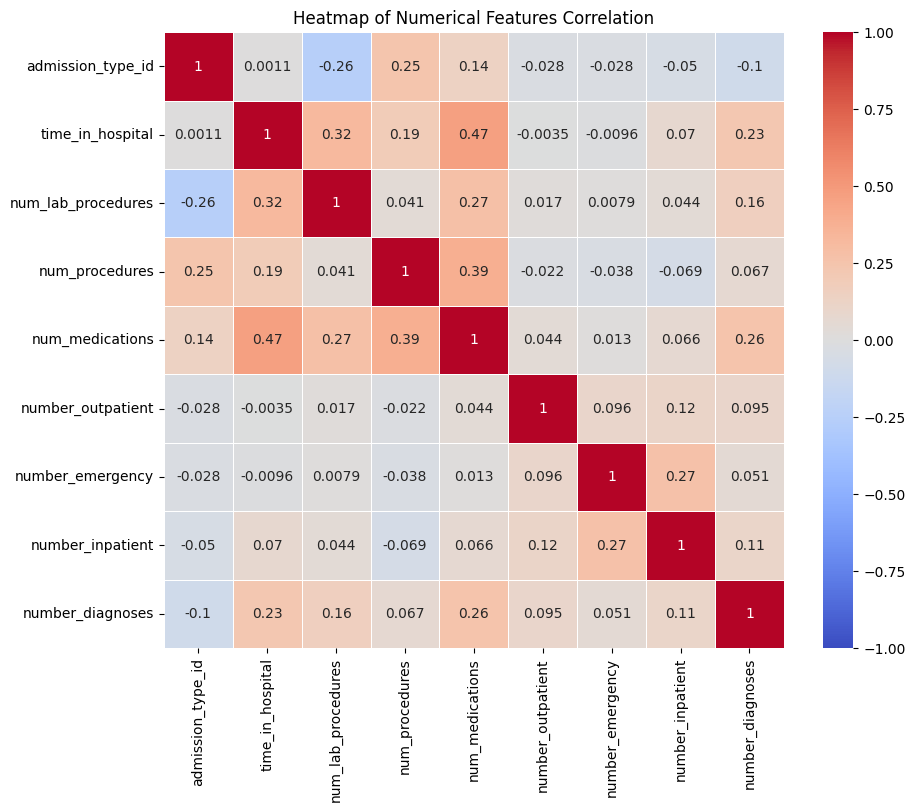

In [187]:
data = data.drop(['readmitted'], axis=1)

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

data_numerical = data[numerical_columns]

correlation_matrix = data_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, vmin = -1, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

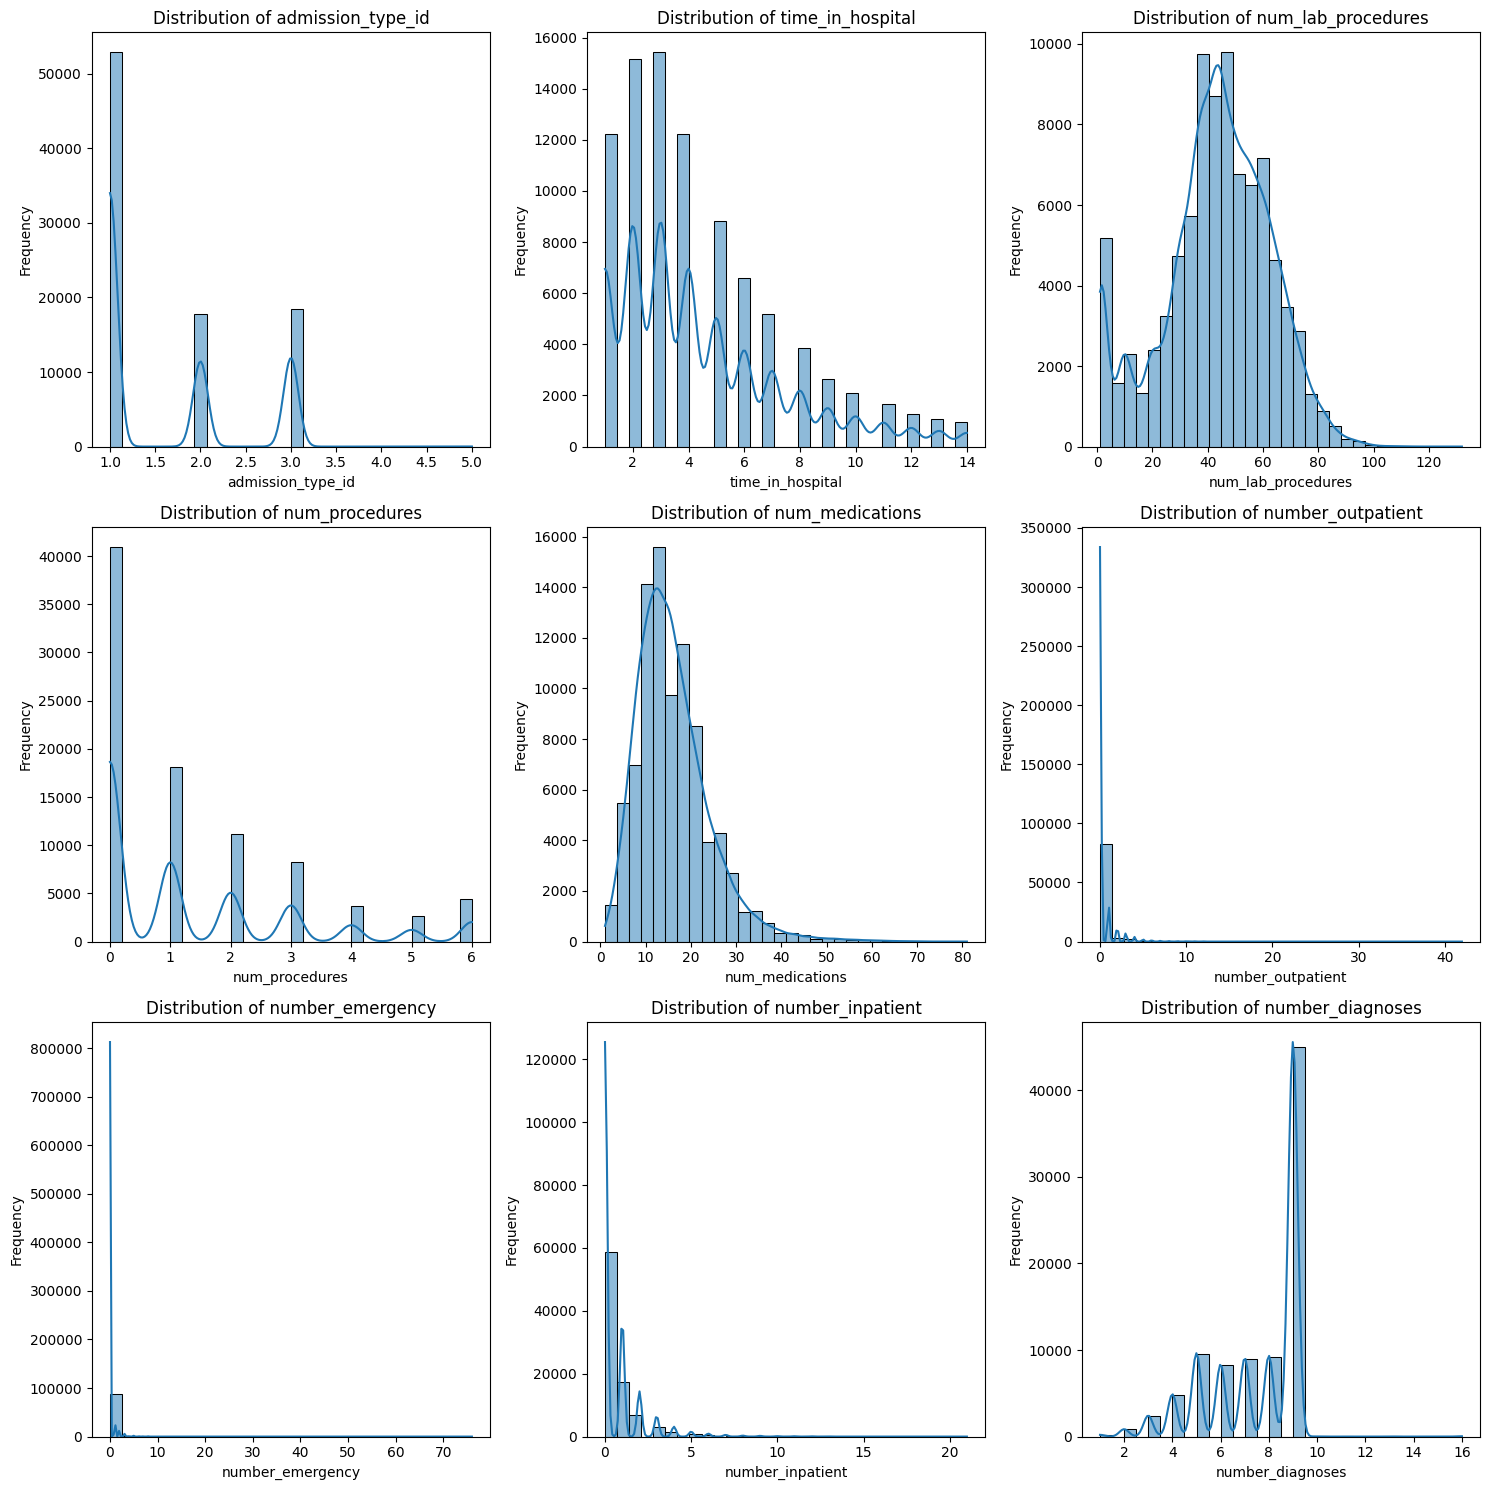

In [188]:
num_plots = len(numerical_columns)
num_rows = int(num_plots / 3) + (num_plots % 3 > 0)
num_cols = min(3, num_plots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

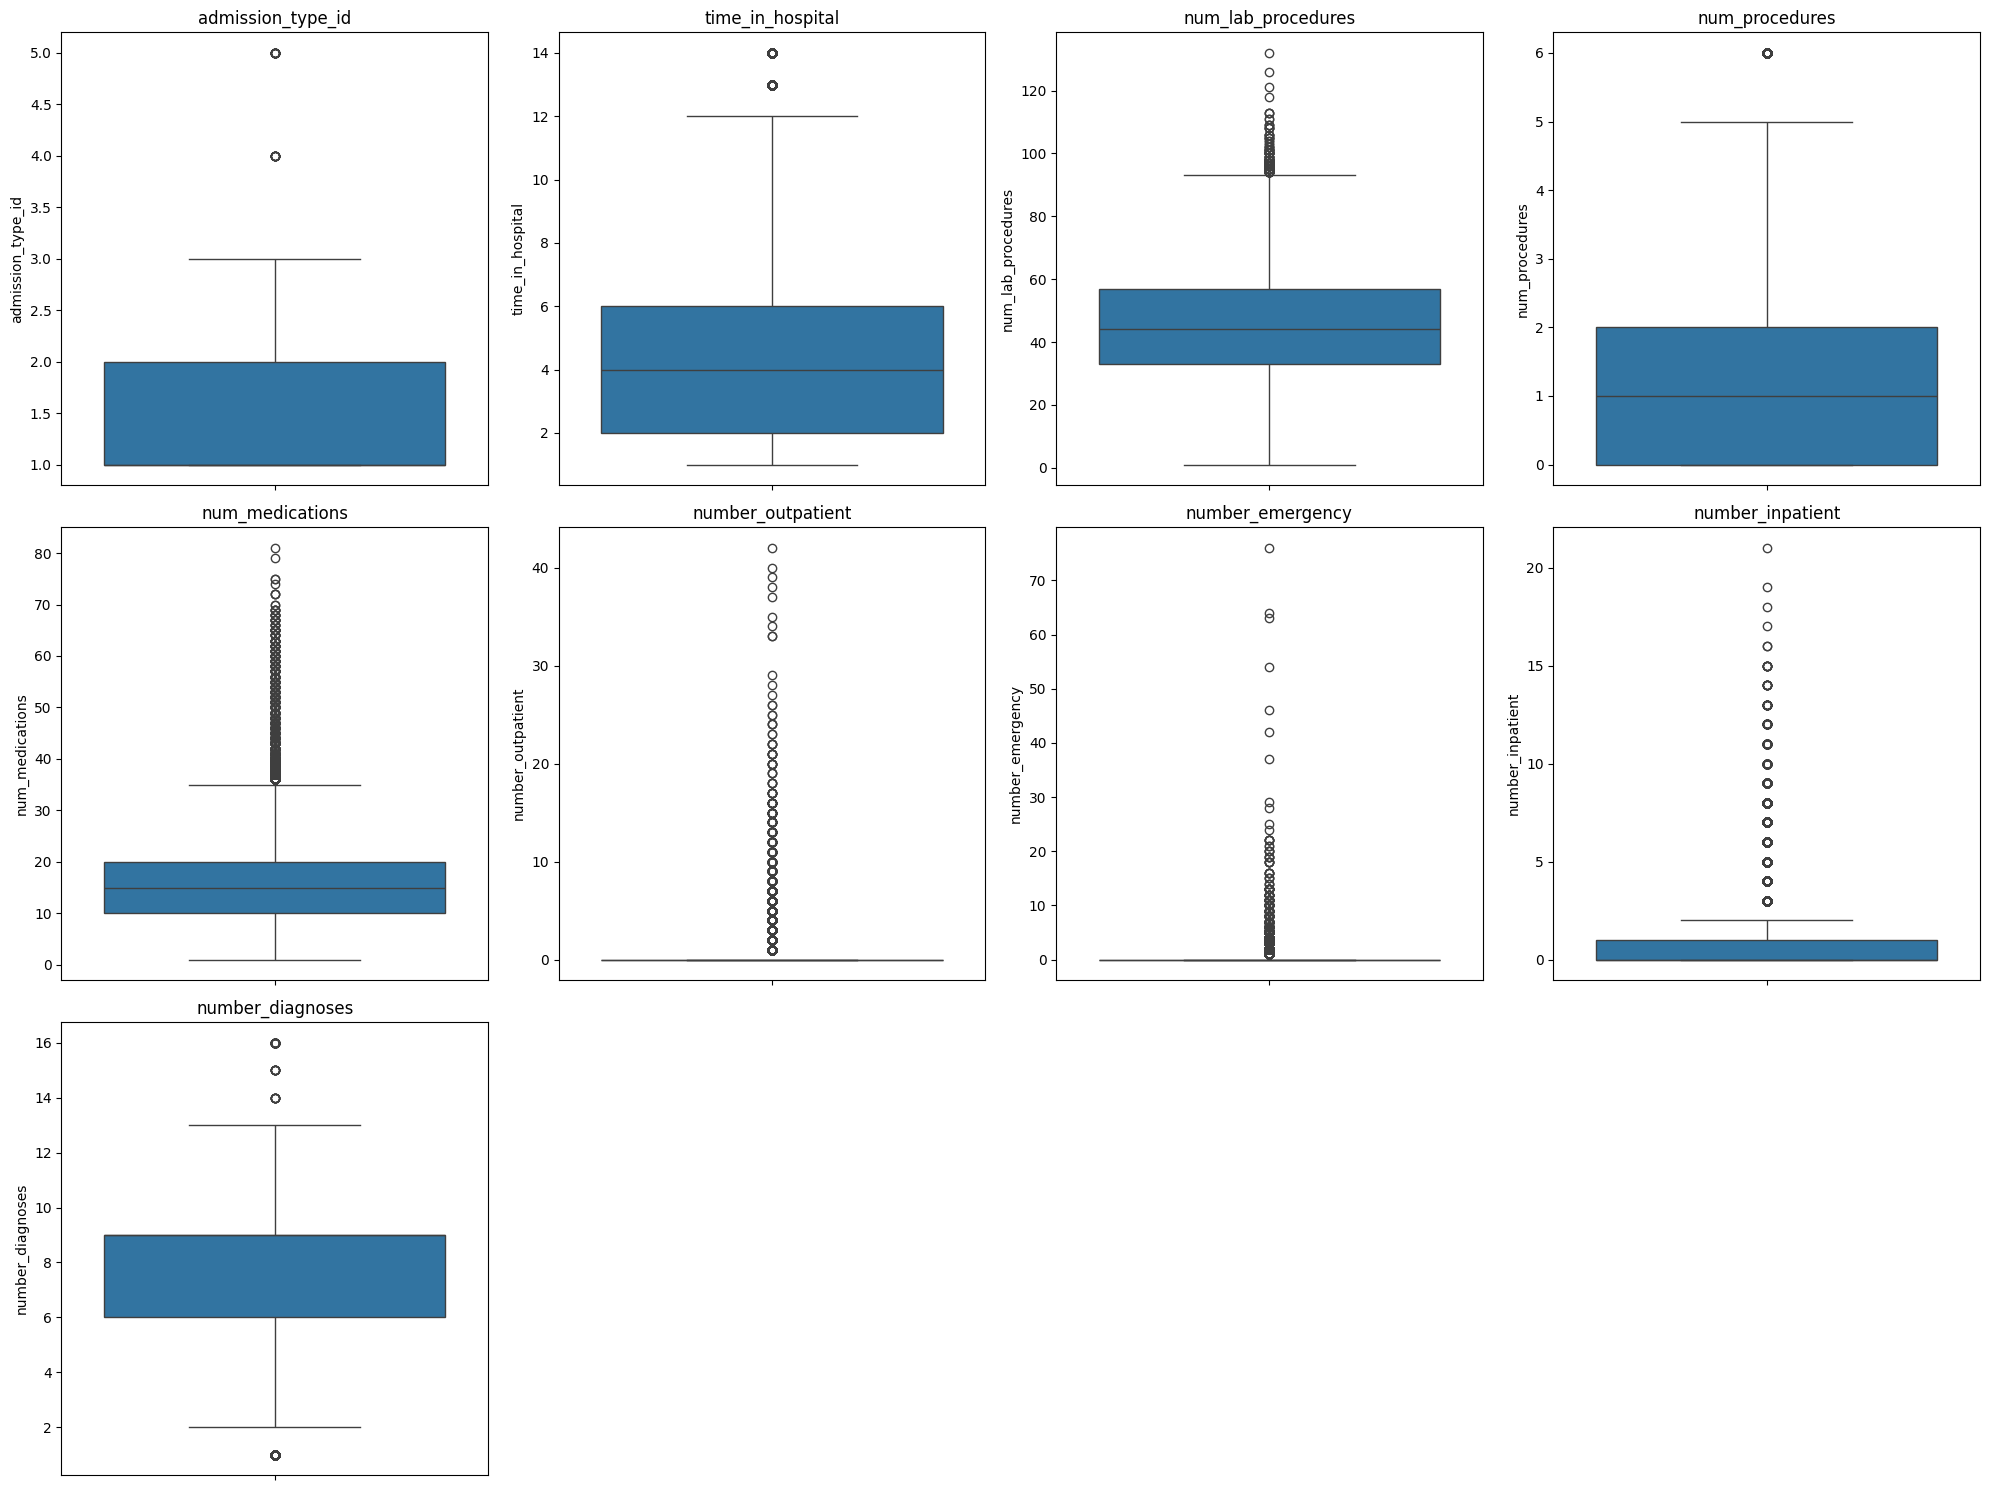

In [189]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

num_columns = len(numerical_columns)
num_rows = (num_columns // 4) + 1

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Using `winsorize` we consider dropping oulires of upper and down of 5 percent of our data  above 95% or under 5 % our data .

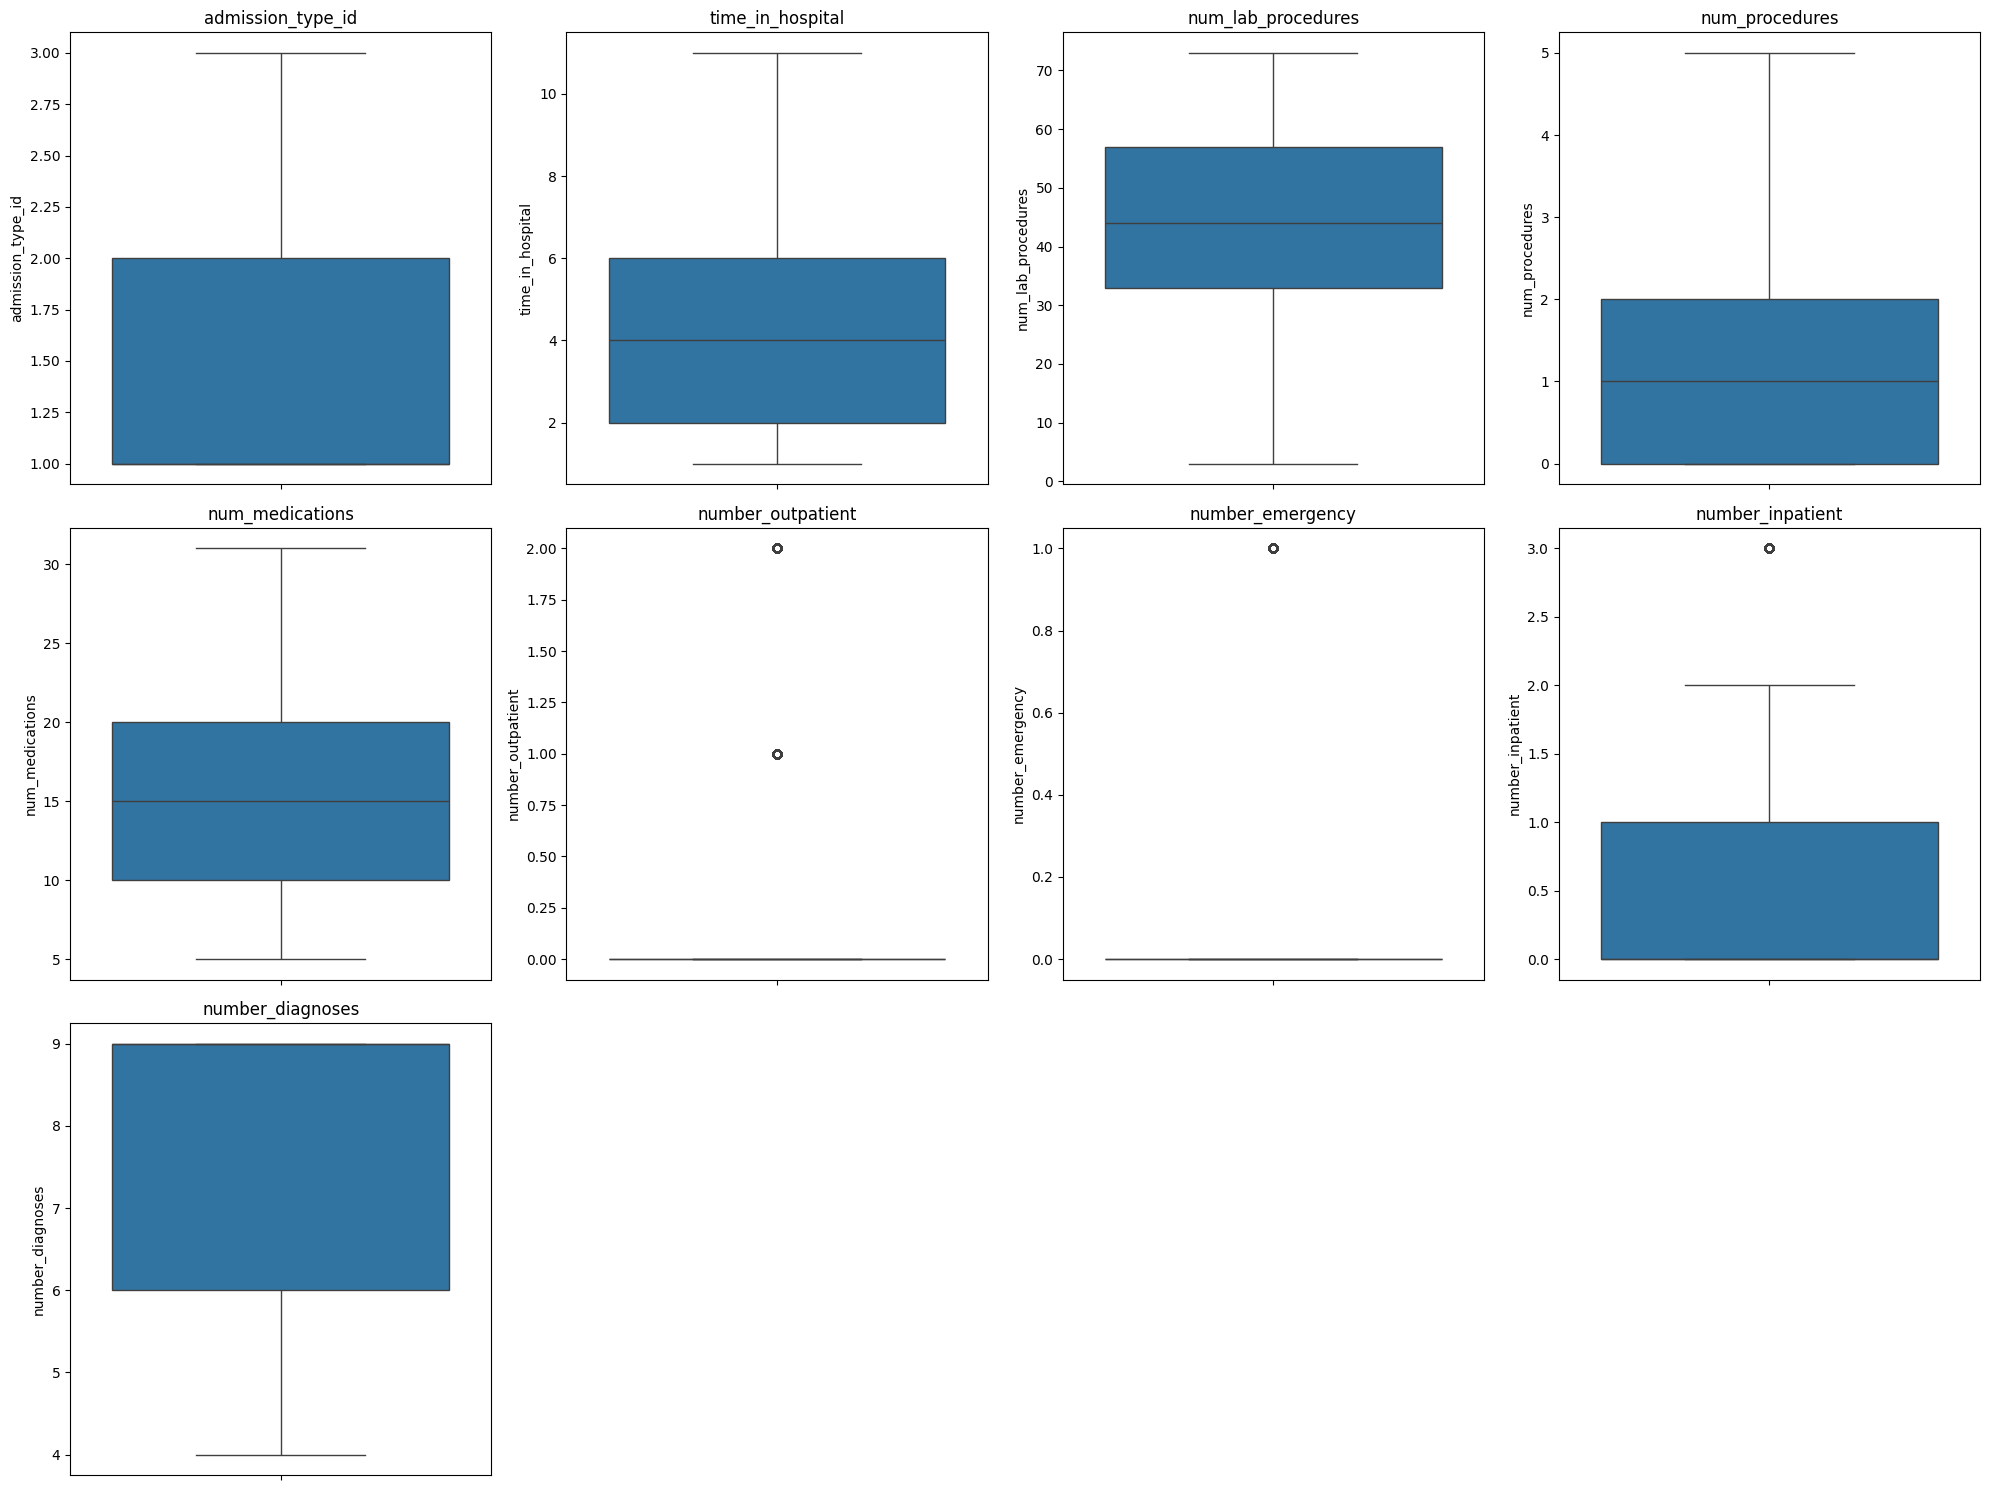

In [190]:
from scipy.stats.mstats import winsorize

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    data[column] = winsorize(data[column], limits=[0.05, 0.05])

num_columns = len(numerical_columns)
num_rows = (num_columns // 4) + 1

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


## Encoding Categorical Variables

In [191]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object')

In [192]:
data.to_csv("diabetic_clean.csv",index=False)

# **Dimentionality Reduction**


Let's have a look at the dataset again.


In [193]:
for col in data.columns:
    unique_values_counts = data[col].value_counts()
    print(f"Unique values and their counts in '{col}':")
    print(unique_values_counts)
    print()

Unique values and their counts in 'race':
race
Caucasian          67561
AfricanAmerican    18087
Hispanic            1664
Other               1337
Asian                574
Name: count, dtype: int64

Unique values and their counts in 'gender':
gender
Female    48129
Male      41094
Name: count, dtype: int64

Unique values and their counts in 'age':
age
[70-80)     22612
[60-70)     19910
[50-60)     15211
[80-90)     15027
[40-50)      8473
[30-40)      3315
[90-100)     2423
[20-30)      1472
[10-20)       634
[0-10)        146
Name: count, dtype: int64

Unique values and their counts in 'admission_type_id':
admission_type_id
1    52900
3    18537
2    17786
Name: count, dtype: int64

Unique values and their counts in 'time_in_hospital':
time_in_hospital
3     15434
2     15178
1     12239
4     12217
5      8828
6      6610
7      5204
11     4950
8      3846
9      2639
10     2078
Name: count, dtype: int64

Unique values and their counts in 'num_lab_procedures':
num_lab_procedures
7

If we look at the columns again, we can see that there are some columns with only one unique value. These columns doesn't really add anything to our prior knowledge, so let's get rid of these columns. 

In [194]:
import numpy as np

columns_to_drop = []

for col in data.columns:
    unique_values = data[col].value_counts()
    if(len(unique_values) < 2):
        columns_to_drop.append(col)
    else:
        biggest_unique = max(unique_values)
        portion = 0
        size = np.sum(unique_values)
        portion = (biggest_unique / size)
        if(portion > 0.9):
            columns_to_drop.append(col)

smaller_data = data.drop(columns=columns_to_drop)

smaller_data = smaller_data.drop(['race'], axis=1)

In [195]:
for col in smaller_data.columns:
    unique_values_counts = smaller_data[col].value_counts()
    print(f"Unique values and their counts in '{col}':")
    print(unique_values_counts)
    print()

Unique values and their counts in 'gender':
gender
Female    48129
Male      41094
Name: count, dtype: int64

Unique values and their counts in 'age':
age
[70-80)     22612
[60-70)     19910
[50-60)     15211
[80-90)     15027
[40-50)      8473
[30-40)      3315
[90-100)     2423
[20-30)      1472
[10-20)       634
[0-10)        146
Name: count, dtype: int64

Unique values and their counts in 'admission_type_id':
admission_type_id
1    52900
3    18537
2    17786
Name: count, dtype: int64

Unique values and their counts in 'time_in_hospital':
time_in_hospital
3     15434
2     15178
1     12239
4     12217
5      8828
6      6610
7      5204
11     4950
8      3846
9      2639
10     2078
Name: count, dtype: int64

Unique values and their counts in 'num_lab_procedures':
num_lab_procedures
73    4639
3     4587
43    2597
44    2275
45    2176
      ... 
14     289
7      274
15     264
5      243
6      237
Name: count, Length: 71, dtype: int64

Unique values and their counts in 'num_p

In [196]:
def get_avg(string):
    values = string.split('-')
    values[0] = values[0][1:]
    values[1] = values[1][:-1]
    return int(values[0]) / 2 + int(values[1]) / 2

smaller_data['age'] = smaller_data['age'].apply(get_avg)


In [197]:
mapper = {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3}
for col in ['glyburide-metformin', 'insulin', 'rosiglitazone', 'pioglitazone', 'glyburide', 'glipizide', 'glimepiride', 'nateglinide', 'repaglinide', 'metformin']:
    try: 
        smaller_data[col] = smaller_data[col].map(mapper)
    except KeyError:
        pass
smaller_data['diabetesMed'] = smaller_data['diabetesMed'].map({'No': 0, 'Yes': 1})
smaller_data['change'] = smaller_data['change'].map({'No': 0, 'Ch': 1})

one_hot = pd.get_dummies(smaller_data['diag_1']) * 3
one_hot += pd.get_dummies(smaller_data['diag_2']) * 4
one_hot += pd.get_dummies(smaller_data['diag_3']) * 5
smaller_data.drop(['diag_1', 'diag_2', 'diag_3'], axis = 1, inplace=True)
smaller_data = smaller_data.join(one_hot)

numerical_columns = smaller_data.select_dtypes(['int64', 'float64','int', 'float']).columns
data_categorical = smaller_data.drop(columns=numerical_columns)
data_encoded = pd.get_dummies(data_categorical, drop_first=True, dtype=int)
smaller_data = pd.concat([smaller_data[numerical_columns], data_encoded], axis=1)

for col in smaller_data.columns:
    unique_values_counts = smaller_data[col].value_counts()
    print(f"Unique values and their counts in '{col}':")
    print(unique_values_counts)
    print()



Unique values and their counts in 'age':
age
75.0    22612
65.0    19910
55.0    15211
85.0    15027
45.0     8473
35.0     3315
95.0     2423
25.0     1472
15.0      634
5.0       146
Name: count, dtype: int64

Unique values and their counts in 'admission_type_id':
admission_type_id
1    52900
3    18537
2    17786
Name: count, dtype: int64

Unique values and their counts in 'time_in_hospital':
time_in_hospital
3     15434
2     15178
1     12239
4     12217
5      8828
6      6610
7      5204
11     4950
8      3846
9      2639
10     2078
Name: count, dtype: int64

Unique values and their counts in 'num_lab_procedures':
num_lab_procedures
73    4639
3     4587
43    2597
44    2275
45    2176
      ... 
14     289
7      274
15     264
5      243
6      237
Name: count, Length: 71, dtype: int64

Unique values and their counts in 'num_procedures':
num_procedures
0    40935
1    18064
2    11139
3     8242
5     7106
4     3737
Name: count, dtype: int64

Unique values and their counts

In [198]:
smaller_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89223 entries, 1 to 101765
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 89223 non-null  float64
 1   admission_type_id   89223 non-null  int64  
 2   time_in_hospital    89223 non-null  int64  
 3   num_lab_procedures  89223 non-null  int64  
 4   num_procedures      89223 non-null  int64  
 5   num_medications     89223 non-null  int64  
 6   number_outpatient   89223 non-null  int64  
 7   number_emergency    89223 non-null  int64  
 8   number_inpatient    89223 non-null  int64  
 9   number_diagnoses    89223 non-null  int64  
 10  metformin           89223 non-null  int64  
 11  glipizide           89223 non-null  int64  
 12  glyburide           89223 non-null  int64  
 13  insulin             89223 non-null  int64  
 14  change              89223 non-null  int64  
 15  diabetesMed         89223 non-null  int64  
 16  Circulat

In [199]:
for col in smaller_data.columns:
    smaller_data[col] = smaller_data[col].astype(int)

In [200]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
reduced_data = pca.fit_transform(smaller_data)
print(pca.explained_variance_ratio_)

reduced_data = pd.DataFrame(reduced_data)
reduced_data.columns = ['F1', 'F2', 'F3']

[0.49096591 0.35890961 0.06610427]


Silhouette Coefficient for K-Means clustering with 2 clusters: 0.31
Silhouette Coefficient for K-Means clustering with 3 clusters: 0.33
Silhouette Coefficient for K-Means clustering with 4 clusters: 0.31
Silhouette Coefficient for K-Means clustering with 5 clusters: 0.30
Silhouette Coefficient for K-Means clustering with 6 clusters: 0.30
Silhouette Coefficient for K-Means clustering with 7 clusters: 0.27
Silhouette Coefficient for K-Means clustering with 8 clusters: 0.28
Silhouette Coefficient for K-Means clustering with 9 clusters: 0.28
Silhouette Coefficient for K-Means clustering with 10 clusters: 0.26
Silhouette Coefficient for K-Means clustering with 11 clusters: 0.28
Silhouette Coefficient for K-Means clustering with 12 clusters: 0.27
Silhouette Coefficient for K-Means clustering with 13 clusters: 0.27
Silhouette Coefficient for K-Means clustering with 14 clusters: 0.27
Silhouette Coefficient for K-Means clustering with 15 clusters: 0.27
Silhouette Coefficient for K-Means cluster

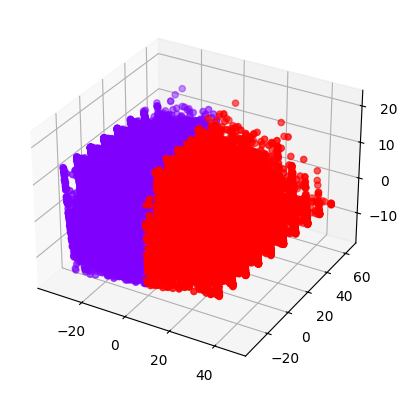

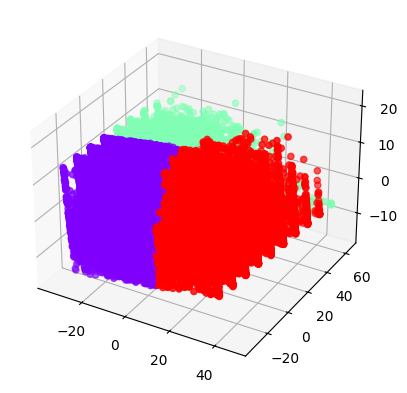

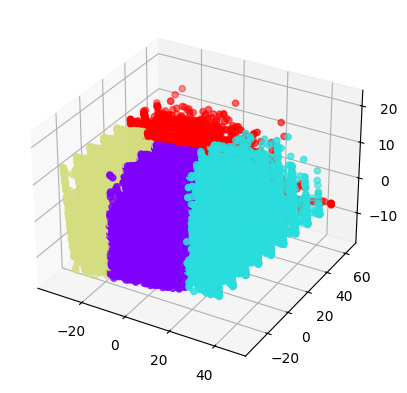

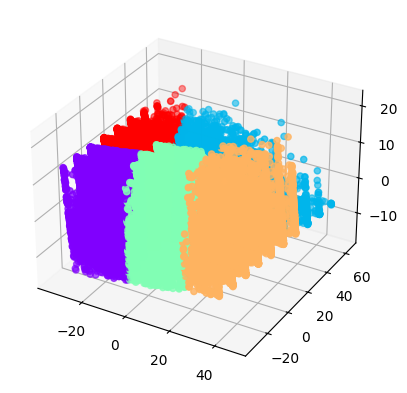

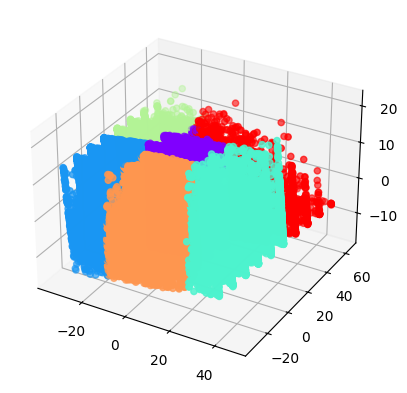

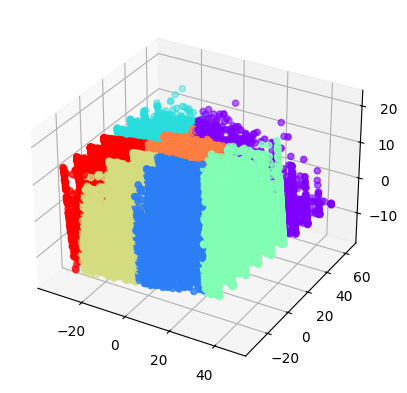

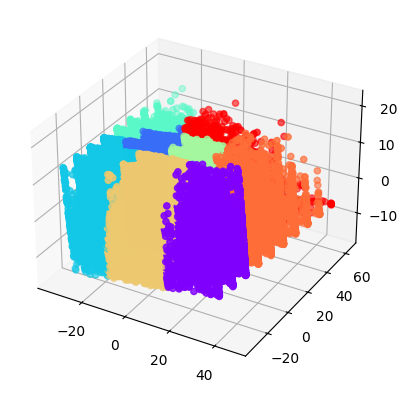

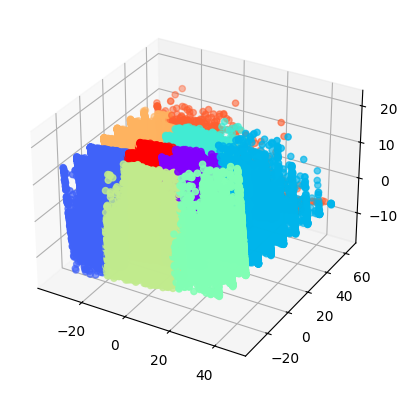

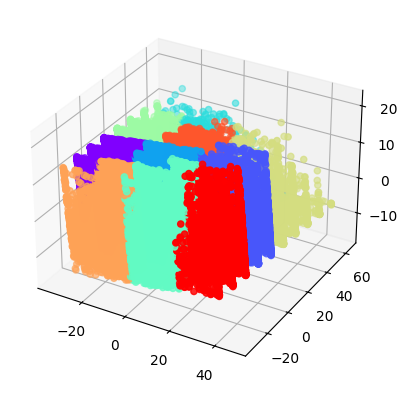

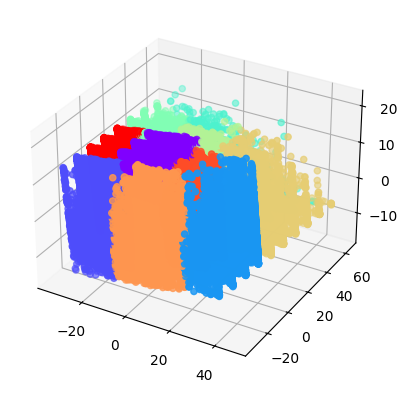

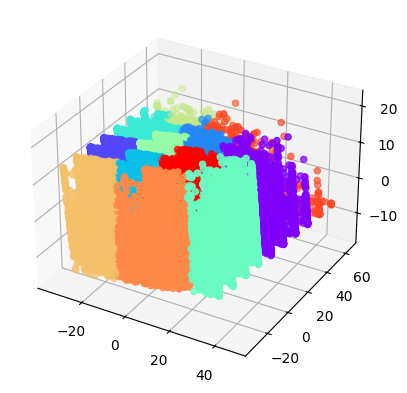

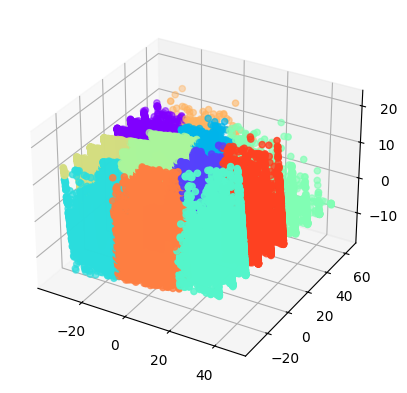

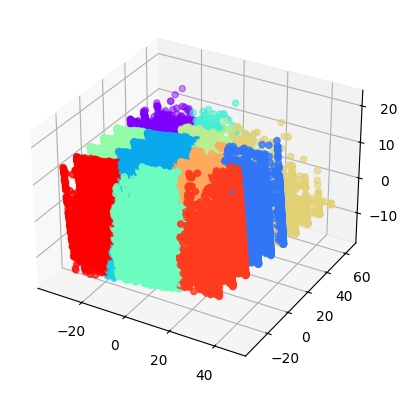

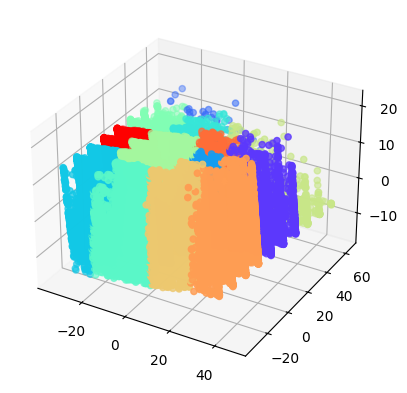

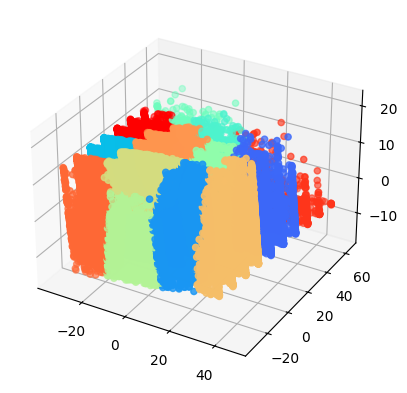

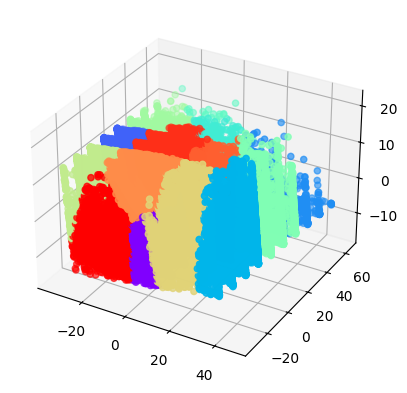

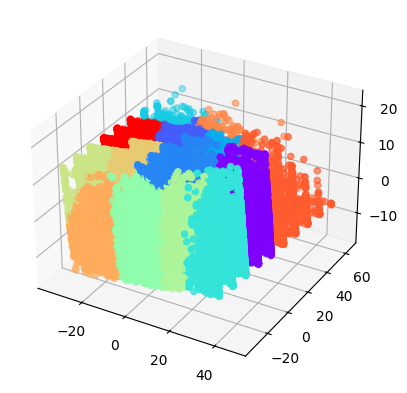

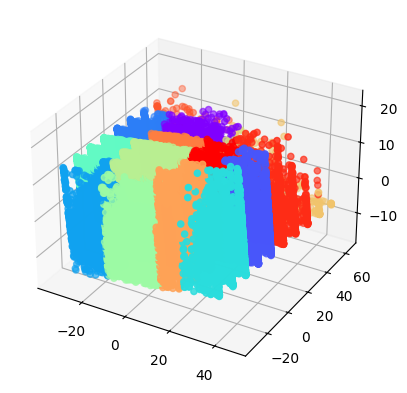

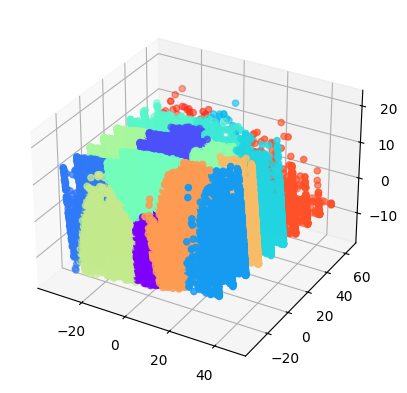

In [201]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

scores = []
for num_of_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=num_of_clusters)
    y_kmeans = kmeans.fit_predict(reduced_data)
    sc = metrics.silhouette_score(reduced_data, kmeans.labels_)
    scores.append([num_of_clusters, sc])
    print("Silhouette Coefficient for K-Means clustering with %d clusters: %0.2f" % (num_of_clusters, sc))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(reduced_data['F1'], reduced_data['F2'], reduced_data['F3'], c = y_kmeans, cmap='rainbow')


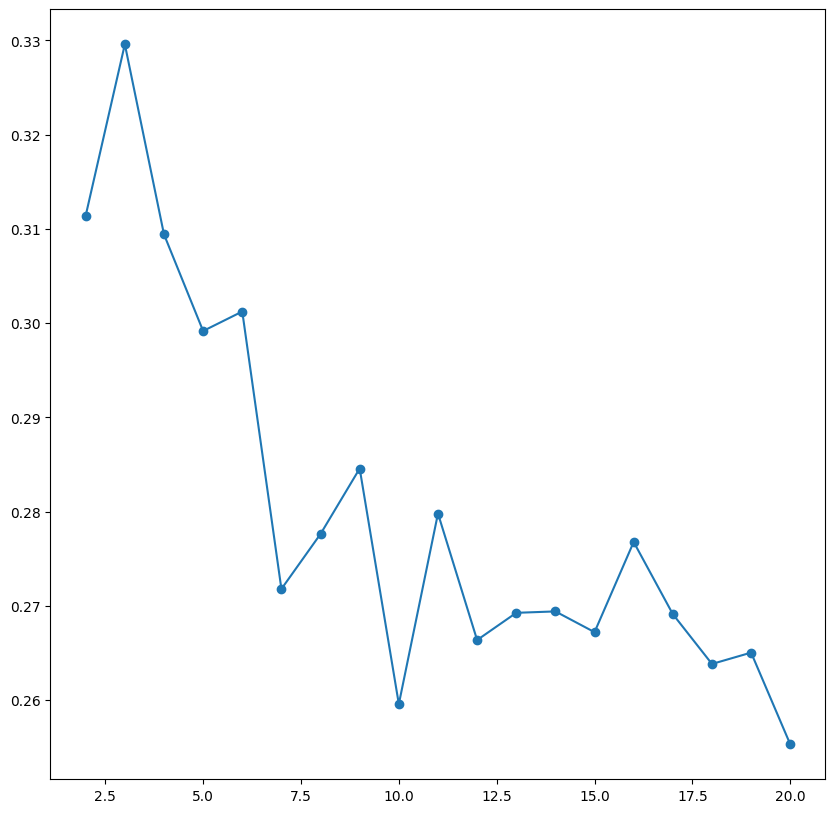

In [205]:
plt.figure(figsize=(10, 10))
plt.plot([score[0] for score in scores], [score[1] for score in scores], 'o-')
plt.show()

In [209]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

neighbors = 6
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(reduced_data)
distances, indices = nbrs.kneighbors(reduced_data)
distance_desc = sorted(distances[:,5], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

In [210]:
from kneed import KneeLocator

kneedle = KneeLocator(range(1,len(distance_desc)+1), distance_desc, S=1.0, curve="convex", direction="decreasing")
kneedle.knee_y

3.9902471719937713

12 43 0.09585109214844471


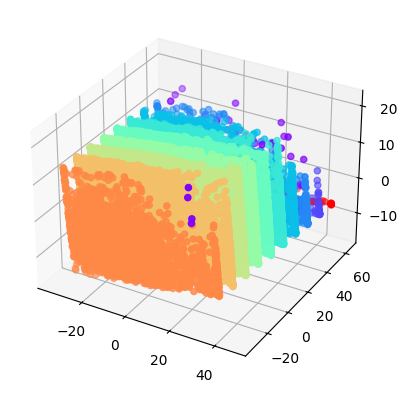

In [211]:
dbscan = DBSCAN(eps=kneedle.knee_y, min_samples=6)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(reduced_data['F1'], reduced_data['F2'], reduced_data['F3'], c = dbscan.fit_predict(reduced_data), cmap='rainbow')
score = metrics.silhouette_score(reduced_data, dbscan.labels_)
print(len(np.unique(dbscan.labels_)), len([i for i in dbscan.labels_ if i == -1]), score)

## Questions

1-2. First we dropped the columns with highest number of missing values, then we dropped identifing columns (that have a unique value for each entry), then we dropped 'readmitted' columns, because that is actually our target column and because it is unsupervised learning, we should get rid of that as well. Using winsorize module, we omitted the outliers which gives us better dimensionality reduction quality. We mapped the three columns 'diag_1', 'diag_2', and 'diag_3' to some categorical values based on the data provided above, we mapped some other columns. We also dropped some columns with the majority (more than 95%) being the same. We also dropped 'admission_source_id' column, because it add nothing to our prior knowledge. 

4. Elbow Method: This method involves running the K-Means algorithm for a range of values of k (e.g., k from 1 to 10) and then plotting the total within-cluster sum of square (wss) against the number of clusters (k). The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

    Silhouette Analysis: This method can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to the points in the neighboring clusters. This measure has a range of [-1, 1]. Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

5. Epsilon (eps): This is the maximum distance between two samples for them to be considered as in the same neighborhood. One way to find a suitable value for eps is by using a k-distance graph. Here’s how:
For each point, compute the distance to its closest k neighbors.
Plot these distances in ascending order.
The optimal value for eps is usually where there is an “elbow” in the graph, i.e., where the rate of increase sharply changes.

    minPts: This is the number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself. A lower minPts means it will be easier to form a cluster, and higher minPts makes it harder for points to form a cluster. A common choice is minPts = 2*dim where dim is the dimensionality of the dataset.

6. 
### **Advantages of K-Means**
- Easy to understand and implement.
- Can handle large datasets well.

### **Disadvantages of K-Means**
- Sensitive to number of clusters/centroids chosen. Even after using techniques like Elbow method, it is sometimes hard to generate good clusters.
- Does not work well with outliers. Centroids can get dragged by the outliers resulting in skewed clusters.
- Gets difficult in high dimensional spaces as the distance between the points increases and Euclidean distance diverges (converges to a constant value).
- Gets slow as the number of dimensions increases.

### **Advantages of DBSCAN**
- Works well for noisy datasets.
- Can identity Outliers easily.
- Clusters can take any irregular shape unlike K-Means where clusters are more or less spherical.

### **Disadvantages of DBSCAN**
- Does not work very well for sparse datasets or datasets with varying density.
- Sensitive to eps and minPts parameters.
- Not partitionable for multiprocessor systems.

### **K-Means:**

- When the shape of your clusters is hyper-spherical: K-Means assumes that clusters are convex and isotropic (the same in all directions), which means it works best when the clusters are round.
- When you have a large dataset: K-Means can be computationally faster than hierarchical clustering (if K is small).
- When you know the number of clusters: K-Means requires you to specify the number of clusters (K) in advance.


### **DBSCAN:**

- When the shape of your clusters is irregular: DBSCAN doesn’t assume any particular shape of the clusters, so it can find clusters of arbitrary shapes.
- When there is noise in your data: DBSCAN is designed to discover clusters in a spatial database from arbitrary shaped clusters and noise.
- When you don’t know the number of clusters: Unlike K-Means, DBSCAN does not require you to specify the number of clusters in advance.